In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from scipy.spatial import distance
# from scipy.sparse.csgraph import minimum_spanning_tree
import math
import pickle
import time
import pandas as pd


## USING PREVIOUS DATA

We want to be able to save thing 

IF Pickled = True then we will previously simulated data using the pickle packge

In [2]:
PICKLED = True

##### set parent directory

In [3]:
import os

# Get the current working directory
current_directory = os.getcwd()
# print("Current Directory:", current_directory)

# Move to the parent directory
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

# Print the updated working directory
updated_directory = os.getcwd()
print("Updated Directory:", updated_directory)

Updated Directory: /mnt/c/users/rjmay/code/research_ms


In [4]:
# os.chdir(os.getcwd() + "/code/research_ms")


### Simulation stage

In [5]:
from modules.multi_bounds_v3 import bounds_class
from modules.Bhatt_knn_func import knn_num_calc
from modules.data_gen_mv import data_gen_multivariate


In [6]:
mean_sep = np.linspace(0, 5, 10000 , endpoint = True)


In [7]:
exact = []

for i in mean_sep:
    dx = 0.001
    x = np.arange(-5, 8 + dx, dx)
    f0 = np.exp(-0.5 * (x - 0)**2) / np.sqrt(2 * np.pi)
    f1 = np.exp(-0.5 * (x - i)**2) / np.sqrt(2 * np.pi)
    fmin = np.minimum(f0, f1)
    BER = 0.5 * np.sum(fmin * dx)
    exact.append(BER)

#     print("BER 2d:", BER)

In [8]:
x = np.linspace(0,.5, 21, endpoint = True) ## this is the desired mean BER points to be calculated at 

new_mean_sep = [] 
for j in x:
    index = (np.abs(j - np.array(exact) )).argmin()
    new_mean_sep.append(mean_sep[index])

In [9]:
mean_sep = new_mean_sep

In [10]:
bound_obj_lst = []
bound_obj_lst2 = []


if PICKLED: ## We just skip all the data creation if we are using save data. 
    print("USING PREVIOUS DATA NOT SIMULATING DATA ")
else:

    MC_num = 400
    sample_size= 500

    for i in mean_sep:

        start = time.time()
        dim =3 
        mean1 = np.zeros(dim)
        covariance1 = np.identity(dim)
        mean2 = np.zeros(dim)
        mean2[0] = i
        covariance2= np.identity(dim)
        
        func0 = np.random.multivariate_normal
        func1 = np.random.multivariate_normal


        params0 = {'mean': mean1, 'cov': covariance1}
        params1  = {'mean': mean2, 'cov': covariance2}

        generator = data_gen_multivariate(func0, func1,  params0, params1 )
        
        
        
        k = knn_num_calc(sample_size, len(mean1))


        bounds = bounds_class(generator, sample_size=  sample_size, threads =2,  MC_num = MC_num, k_nn=k)
        
        bound_obj_lst.append(bounds)

        
        print("done with 3d ", end = " ")
        dim = 8
        mean1 = np.zeros(dim)
        covariance1 = np.identity(dim)
        mean2 = np.zeros(dim)
        mean2[0] = i
        covariance2= np.identity(dim)

        
        
        
        params0  = {'mean': mean1, 'cov': covariance1}
        params1  = {'mean': mean2, 'cov': covariance2}

        generator = data_gen_multivariate(func0, func1,  params0, params1 )  
        
        k = knn_num_calc(sample_size, len(mean1))

        
        bounds2 = bounds_class(generator, sample_size = sample_size, threads =2,  MC_num = MC_num, k_nn =k )

        bound_obj_lst2.append(bounds2)
        
        
        end = time.time()
        
        print("done with ", i, " in ",  end -start )



done with 3d  done with  5.0  in  314.8197658061981
done with 3d  done with  3.91989198919892  in  339.7298746109009
done with 3d  done with  3.28982898289829  in  309.0542588233948
done with 3d  done with  2.879287928792879  in  340.73796677589417
done with 3d  done with  2.563256325632563  in  345.8902122974396
done with 3d  done with  2.300730073007301  in  315.61367082595825
done with 3d  done with  2.0727072707270726  in  301.9848759174347
done with 3d  done with  1.8691869186918693  in  401.3855903148651
done with 3d  done with  1.683168316831683  in  437.033554315567
done with 3d  done with  1.5106510651065106  in  459.61184215545654
done with 3d  done with  1.349134913491349  in  399.42088532447815
done with 3d  done with  1.1956195619561956  in  429.5056974887848
done with 3d  done with  1.0486048604860485  in  414.09040570259094
done with 3d  done with  0.9075907590759076  in  431.8368592262268
done with 3d  done with  0.7705770577057706  in  346.77849769592285
done with 3d  

##### Pickling
This is where the data either gets save or loaded

In [11]:
file_path = 'sim_data/means_sep_as_BER_v3.pkl' # DONT FORGET TO CHANGE ME IF YOU COPY AND PASTE


if PICKLED  == False:
    
    objects_to_save = bound_obj_lst, bound_obj_lst2


    with open(file_path, 'wb') as file:
        # Use pickle.dump to serialize and write the list of objects to the file
        pickle.dump(objects_to_save, file)
    print(f'Objects saved to {file_path}')
    

elif PICKLED == True:
    

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load to deserialize and load the list of objects from the file
        loaded_objects = pickle.load(file)

    print('Loaded object successfully')
    
    bound_obj_lst, bound_obj_lst2 = loaded_objects

Objects saved to sim_data/means_sep_as_BER_v3.pkl


## Using the data

may or not be pickled. 

In [12]:
exact = []

for i in mean_sep:
    dx = 0.001
    x = np.arange(-5, 8 + dx, dx)

    f0 = np.exp(-0.5 * (x - 0)**2) / np.sqrt(2 * np.pi)
    f1 = np.exp(-0.5 * (x - i)**2) / np.sqrt(2 * np.pi)

    fmin = np.minimum(f0, f1)

    BER = 0.5 * np.sum(fmin * dx)
    
    exact.append(BER)

#     print("BER 2d:", BER)

### Plotting using dim 3

In [13]:
df = pd.DataFrame([obj() for obj in bound_obj_lst], index = exact)


# df

In [14]:
fs = 14
dpi =300

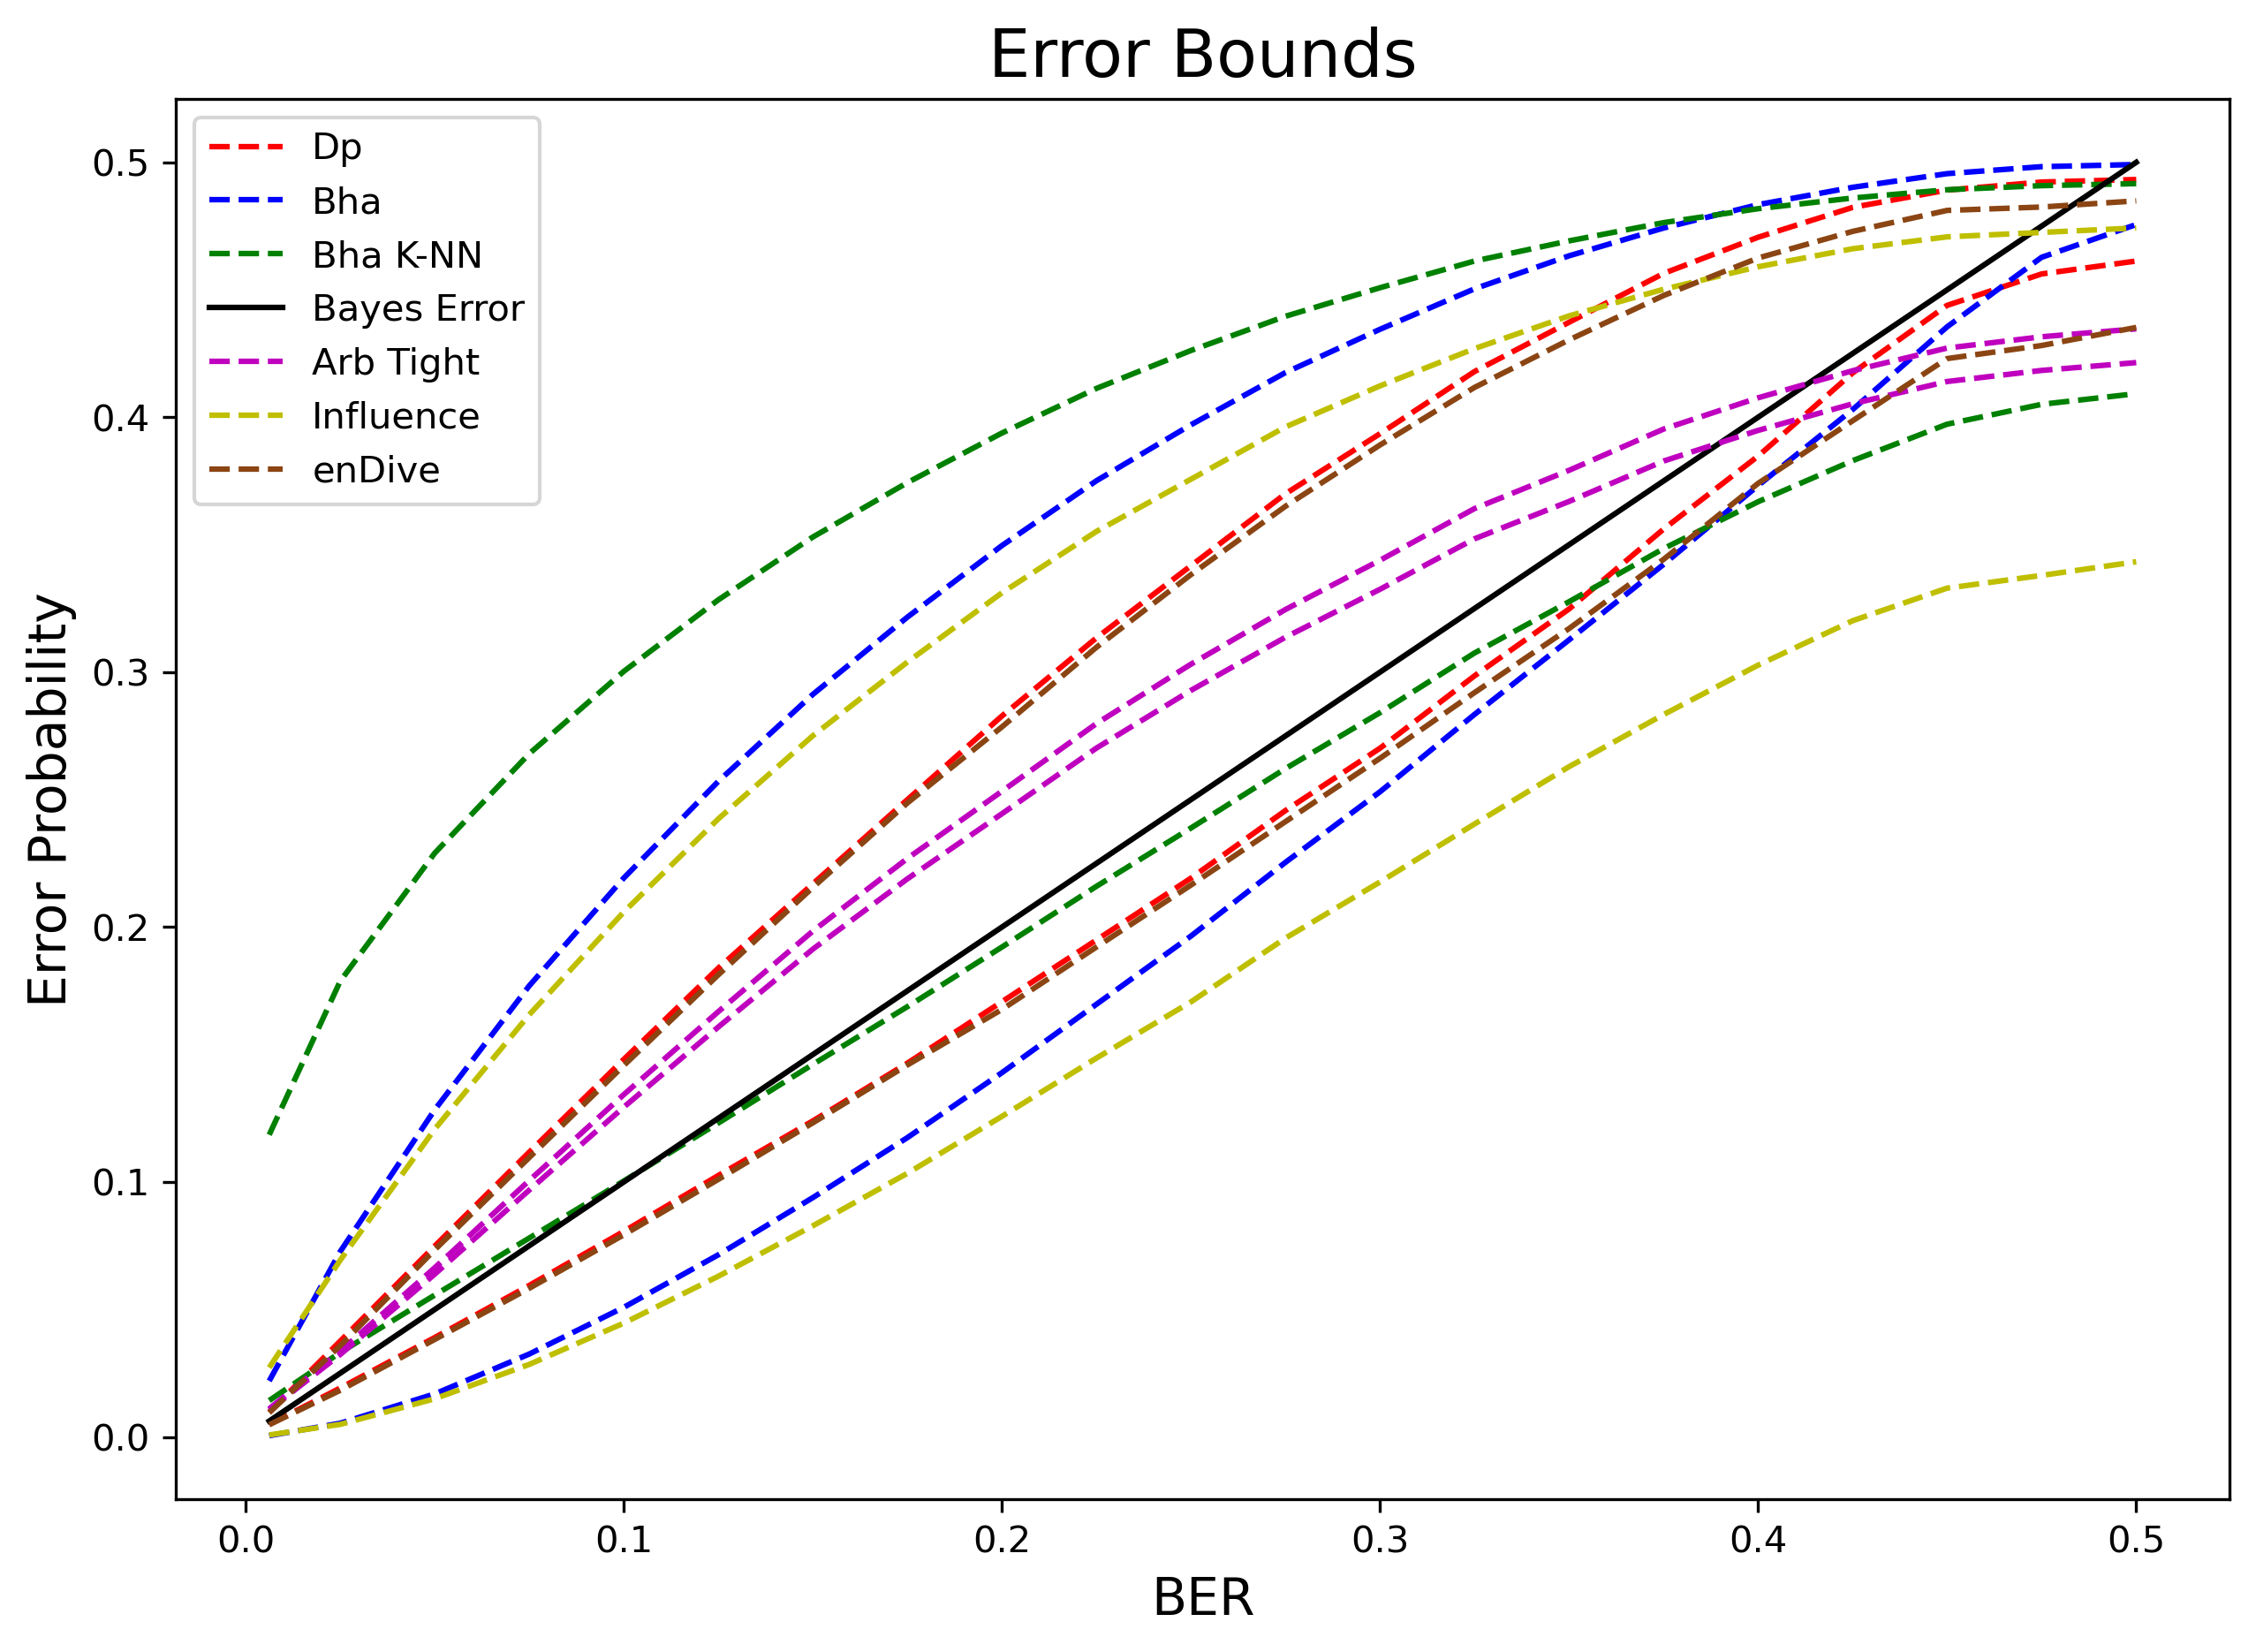

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7), dpi = dpi)

# Plot Dp
ax.plot(df["Dp_lower"], 'r--', label='Dp')
ax.plot(df["Dp_upper"], 'r--')

# Plot Bha
ax.plot(df["Bha_lower"], 'b--', label='Bha')
ax.plot(df["Bha_upper"], 'b--')

# Plot Bha K-NN
ax.plot(df["Bha_knn_lower"], 'g--')
ax.plot(df["Bha_knn_upper"], 'g--', label='Bha K-NN')

# Plot Bayes Error
ax.plot(exact, exact, 'k', label='Bayes Error')

# Plot Lower and Upper G_a
ax.plot(df["tight_lower"], 'm--', label="Arb Tight")
ax.plot(df["tight_upper"], 'm--')


# Plot Maha
# ax.plot( df["Maha_upper"], 'y--', label='Maha')
# ax.scatter(df.index, df["Maha_upper"], color='y', marker='*')

# Plot Lower and Upper G_a
ax.plot(df["inf_lower"], 'y--', label="Influence")
ax.plot(df["inf_upper"], 'y--')



# Plot Lower and Upper enDive
ax.plot(df["enDive_lower"], 'saddlebrown', ls = '--', label="enDive")
ax.plot(df["enDive_upper"], 'saddlebrown', ls = '--',)

ax.set_xlabel("BER", fontsize=fs)
ax.set_ylabel("Error Probability", fontsize=fs)
ax.set_title("Error Bounds", fontsize=fs + 4)
ax.legend()

plt.show()


In [16]:
validity_lst  =[]
for i in range(len(exact)):
    validity_lst.append(bound_obj_lst[i].validity(exact[i]))
    
import pandas as pd
df = pd.DataFrame(validity_lst, index = exact)
# df

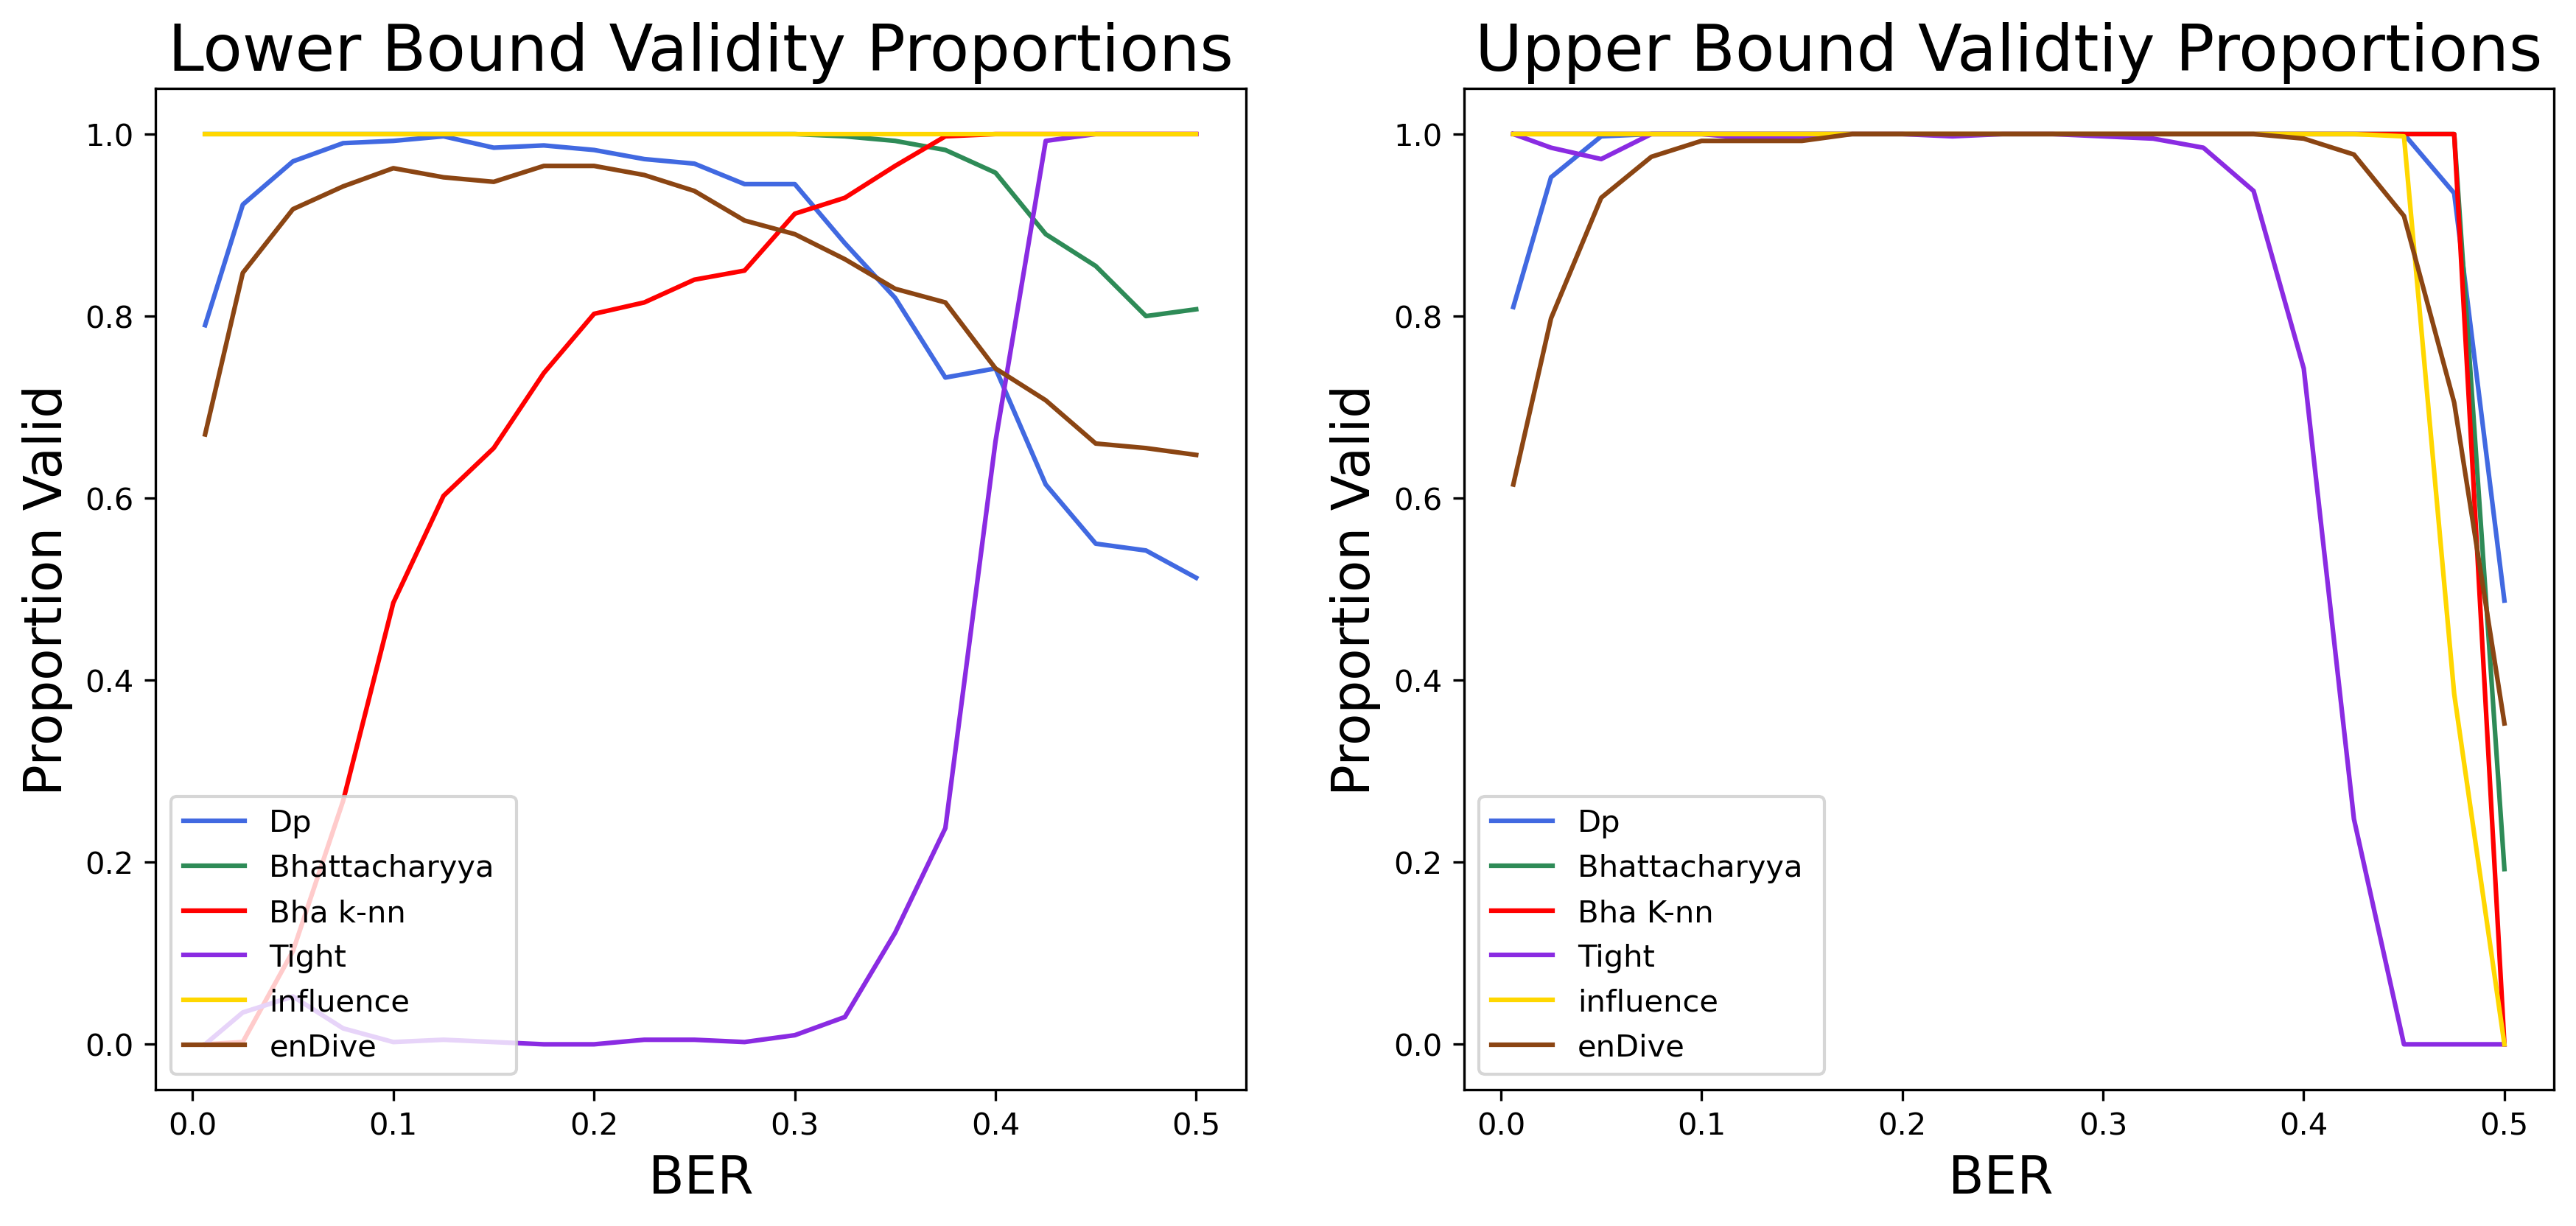

In [17]:
fs =17

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), dpi = dpi)

ax = axes[0]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(df['Dp_lower'], 'royalblue',  label='Dp')

ax.plot(df['Bha_lower'],'seagreen', label='Bhattacharyya ')

ax.plot(df['Bha_knn_lower'],'r', label='Bha k-nn ')

ax.plot(df['tight_lower'], 'blueviolet', label='Tight ')

ax.plot(df['inf_lower'], 'gold', label= 'influence')

ax.plot(df['enDive_lower'], 'saddlebrown', label= 'enDive')


ax.set_xlabel("BER", fontsize = fs)
ax.set_ylabel("Proportion Valid", fontsize=fs)
ax.set_title("Lower Bound Validity Proportions" , fontsize = fs +4)
ax.legend(loc=3)



ax = axes[1]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df['Dp_upper'], 'royalblue',  label='Dp')

ax.plot(df['Bha_upper'],'seagreen', label='Bhattacharyya ')

ax.plot(df['Bha_knn_upper'],'r', label='Bha K-nn ')

ax.plot(df['tight_upper'], 'blueviolet', label='Tight ')

ax.plot(df['inf_upper'], 'gold', label= 'influence')

ax.plot(df['enDive_upper'], 'saddlebrown', label= 'enDive')

# ax.set_ylim([.4, 1.025])
# ax.set_yticks(np.linspace(.5,1,6))


ax.set_xlabel("BER ", fontsize = fs)
ax.set_ylabel("Proportion Valid", fontsize=fs)
ax.set_title("Upper Bound Validtiy Proportions" , fontsize = fs +4)
ax.legend(loc=3)


# plt.savefig("proportions_v2.jpeg",facecolor=(1,1,1,1))
plt.show()

### Plotting using dim 8 

In [18]:

df = pd.DataFrame([obj() for obj in bound_obj_lst2], index = exact)


In [19]:
dpi = 400
fs =17

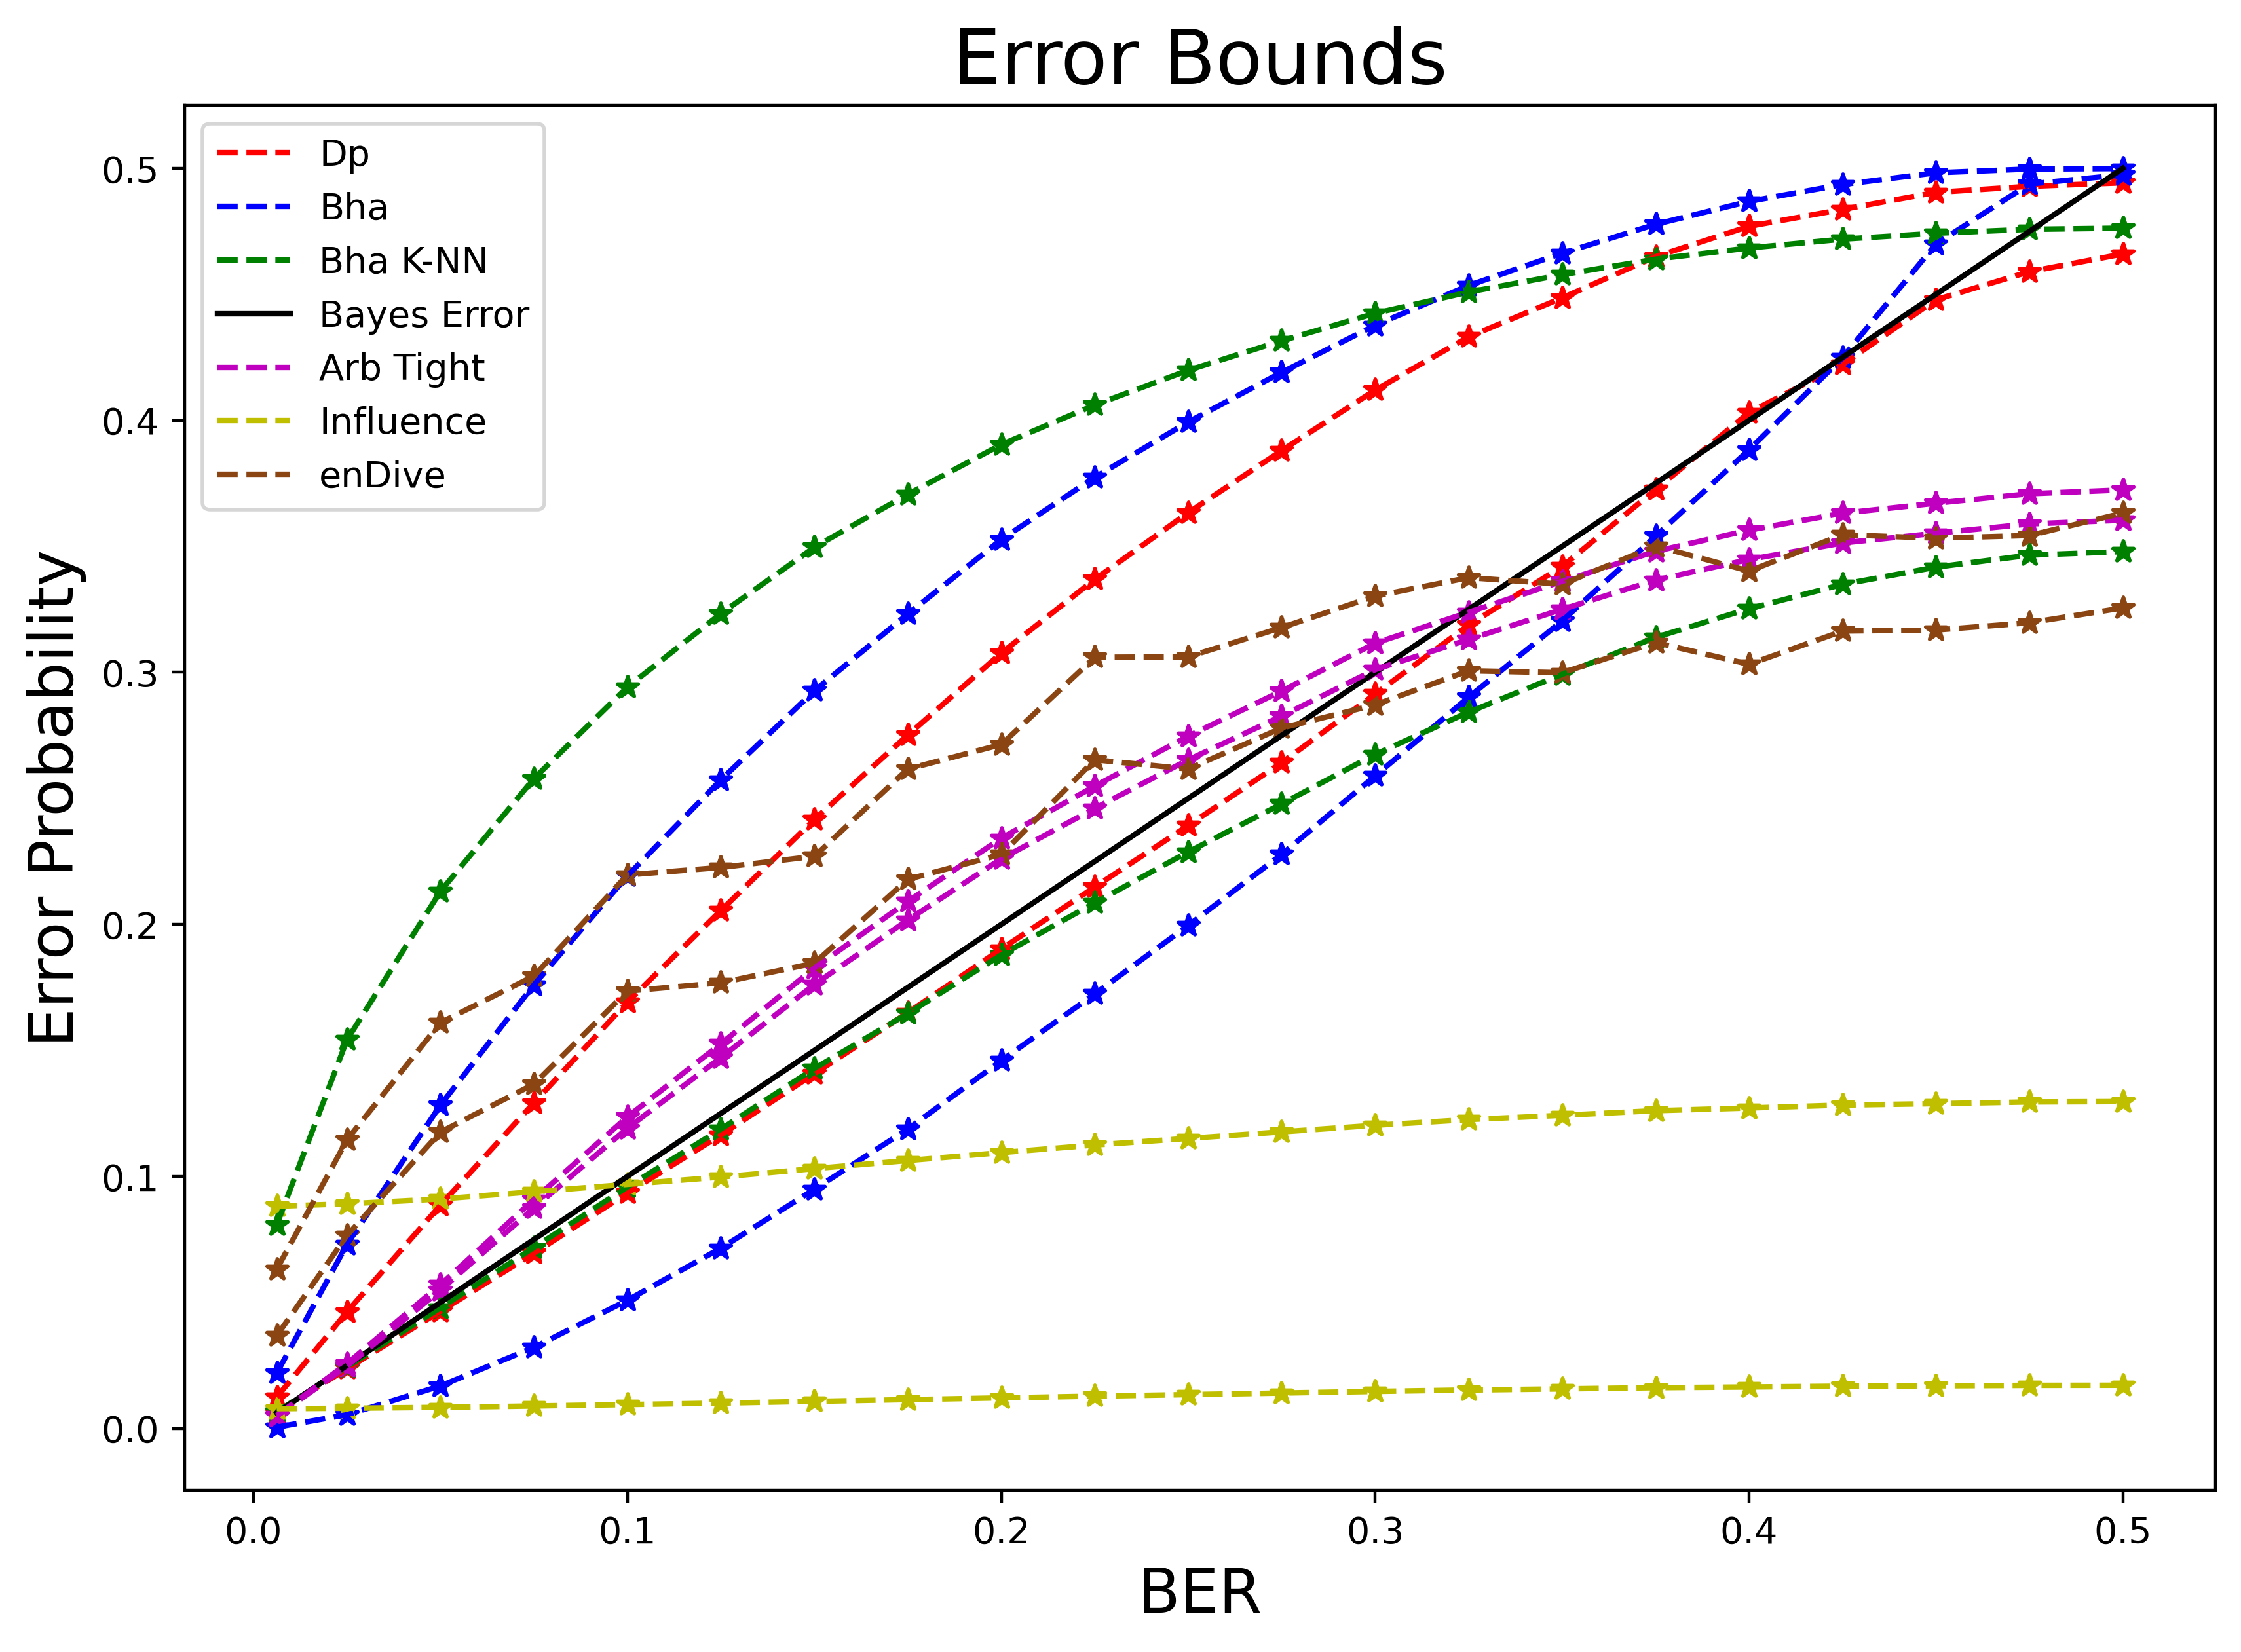

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7), dpi = dpi)


# Plot Dp
ax.plot(df["Dp_lower"], 'r--', label='Dp')
ax.plot(df["Dp_upper"], 'r--')
ax.scatter(df.index, df["Dp_lower"], color='r', marker='*')
ax.scatter(df.index, df["Dp_upper"], color='r', marker='*')

# Plot Bha
ax.plot(df["Bha_lower"], 'b--', label='Bha')
ax.plot(df["Bha_upper"], 'b--')
ax.scatter(df.index, df["Bha_upper"], color='b', marker='*')
ax.scatter(df.index, df["Bha_lower"], color='b', marker='*')

# Plot Bha K-NN
ax.plot(df["Bha_knn_lower"], 'g--')
ax.plot(df["Bha_knn_upper"], 'g--', label='Bha K-NN')
ax.scatter(df.index, df["Bha_knn_upper"], color='g', marker='*')
ax.scatter(df.index, df["Bha_knn_lower"], color='g', marker='*')

# Plot Bayes Error
ax.plot(exact, exact, 'k', label='Bayes Error')

# Plot Lower and Upper G_a
ax.plot(df["tight_lower"], 'm--', label="Arb Tight")
ax.plot(df["tight_upper"], 'm--')
ax.scatter(df.index, df["tight_lower"], color='m', marker='*')
ax.scatter(df.index, df["tight_upper"], color='m', marker='*')

# Plot Maha
# ax.plot( df["Maha_upper"], 'y--', label='Maha')
# ax.scatter(df.index, df["Maha_upper"], color='y', marker='*')

# Plot Lower and Upper G_a
ax.plot(df["inf_lower"], 'y--', label="Influence")
ax.plot(df["inf_upper"], 'y--')
ax.scatter(df.index, df["inf_lower"], color='y', marker='*')
ax.scatter(df.index, df["inf_upper"], color='y', marker='*')


# Plot Lower and Upper enDive
ax.plot(df["enDive_lower"], 'saddlebrown', ls = '--', label="enDive")
ax.plot(df["enDive_upper"], 'saddlebrown', ls = '--',)
ax.scatter(df.index, df["enDive_lower"], color='saddlebrown', marker='*')
ax.scatter(df.index, df["enDive_upper"], color='saddlebrown', marker='*')


ax.set_xlabel("BER", fontsize=fs)
ax.set_ylabel("Error Probability", fontsize=fs)
ax.set_title("Error Bounds", fontsize=fs + 4)
ax.legend()

plt.show()

In [21]:
validity_lst  =[]
for i in range(len(exact)):
    validity_lst.append(bound_obj_lst2[i].validity(exact[i]))
    
import pandas as pd
df = pd.DataFrame(validity_lst, index = exact)
df

,Dp_lower,Dp_upper,Bha_lower,Bha_upper,Bha_knn_lower,Bha_knn_upper,tight_lower,tight_upper,Maha_upper,inf_lower,inf_upper,enDive_lower,enDive_upper
0.006210,0.5300,0.9525,1.0000,1.0,0.3575,1.000,0.8925,0.1600,1.0,0.0,1.0000,0.5000,0.5075
0.025001,0.5975,1.0000,1.0000,1.0,0.5825,1.000,0.5400,0.5525,1.0,1.0,1.0000,0.5000,0.5475
0.049994,0.6775,1.0000,1.0000,1.0,0.6975,1.000,0.3450,0.7375,1.0,1.0,1.0000,0.4950,0.5525
0.074984,0.7475,1.0000,1.0000,1.0,0.7475,1.000,0.1550,0.9075,1.0,1.0,1.0000,0.5025,0.5650
0.099987,0.7500,1.0000,1.0000,1.0,0.7600,1.000,0.0875,0.9575,1.0,1.0,0.0375,0.4800,0.6175
0.124997,0.8025,1.0000,1.0000,1.0,0.8250,1.000,0.0850,0.9550,1.0,1.0,0.0000,0.5275,0.5825
0.150019,0.7975,1.0000,1.0000,1.0,0.7525,1.000,0.0850,0.9550,1.0,1.0,0.0000,0.5550,0.5775
0.174999,0.7600,1.0000,1.0000,1.0,0.8625,1.000,0.0600,0.9800,1.0,1.0,0.0000,0.5225,0.6100
0.200010,0.7800,1.0000,1.0000,1.0,0.8850,1.000,0.0625,0.9700,1.0,1.0,0.0000,0.5350,0.6075
0.225027,0.7350,1.0000,1.0000,1.0,0.9500,1.000,0.1200,0.9450,1.0,1.0,0.0000,0.4700,0.6475


In [22]:
# print(validity_dp_l,  validity_dp_u, validity_Bha_l, validity_Bha_u, validity_tight_l, validity_tight_u )

Upper bound Validity

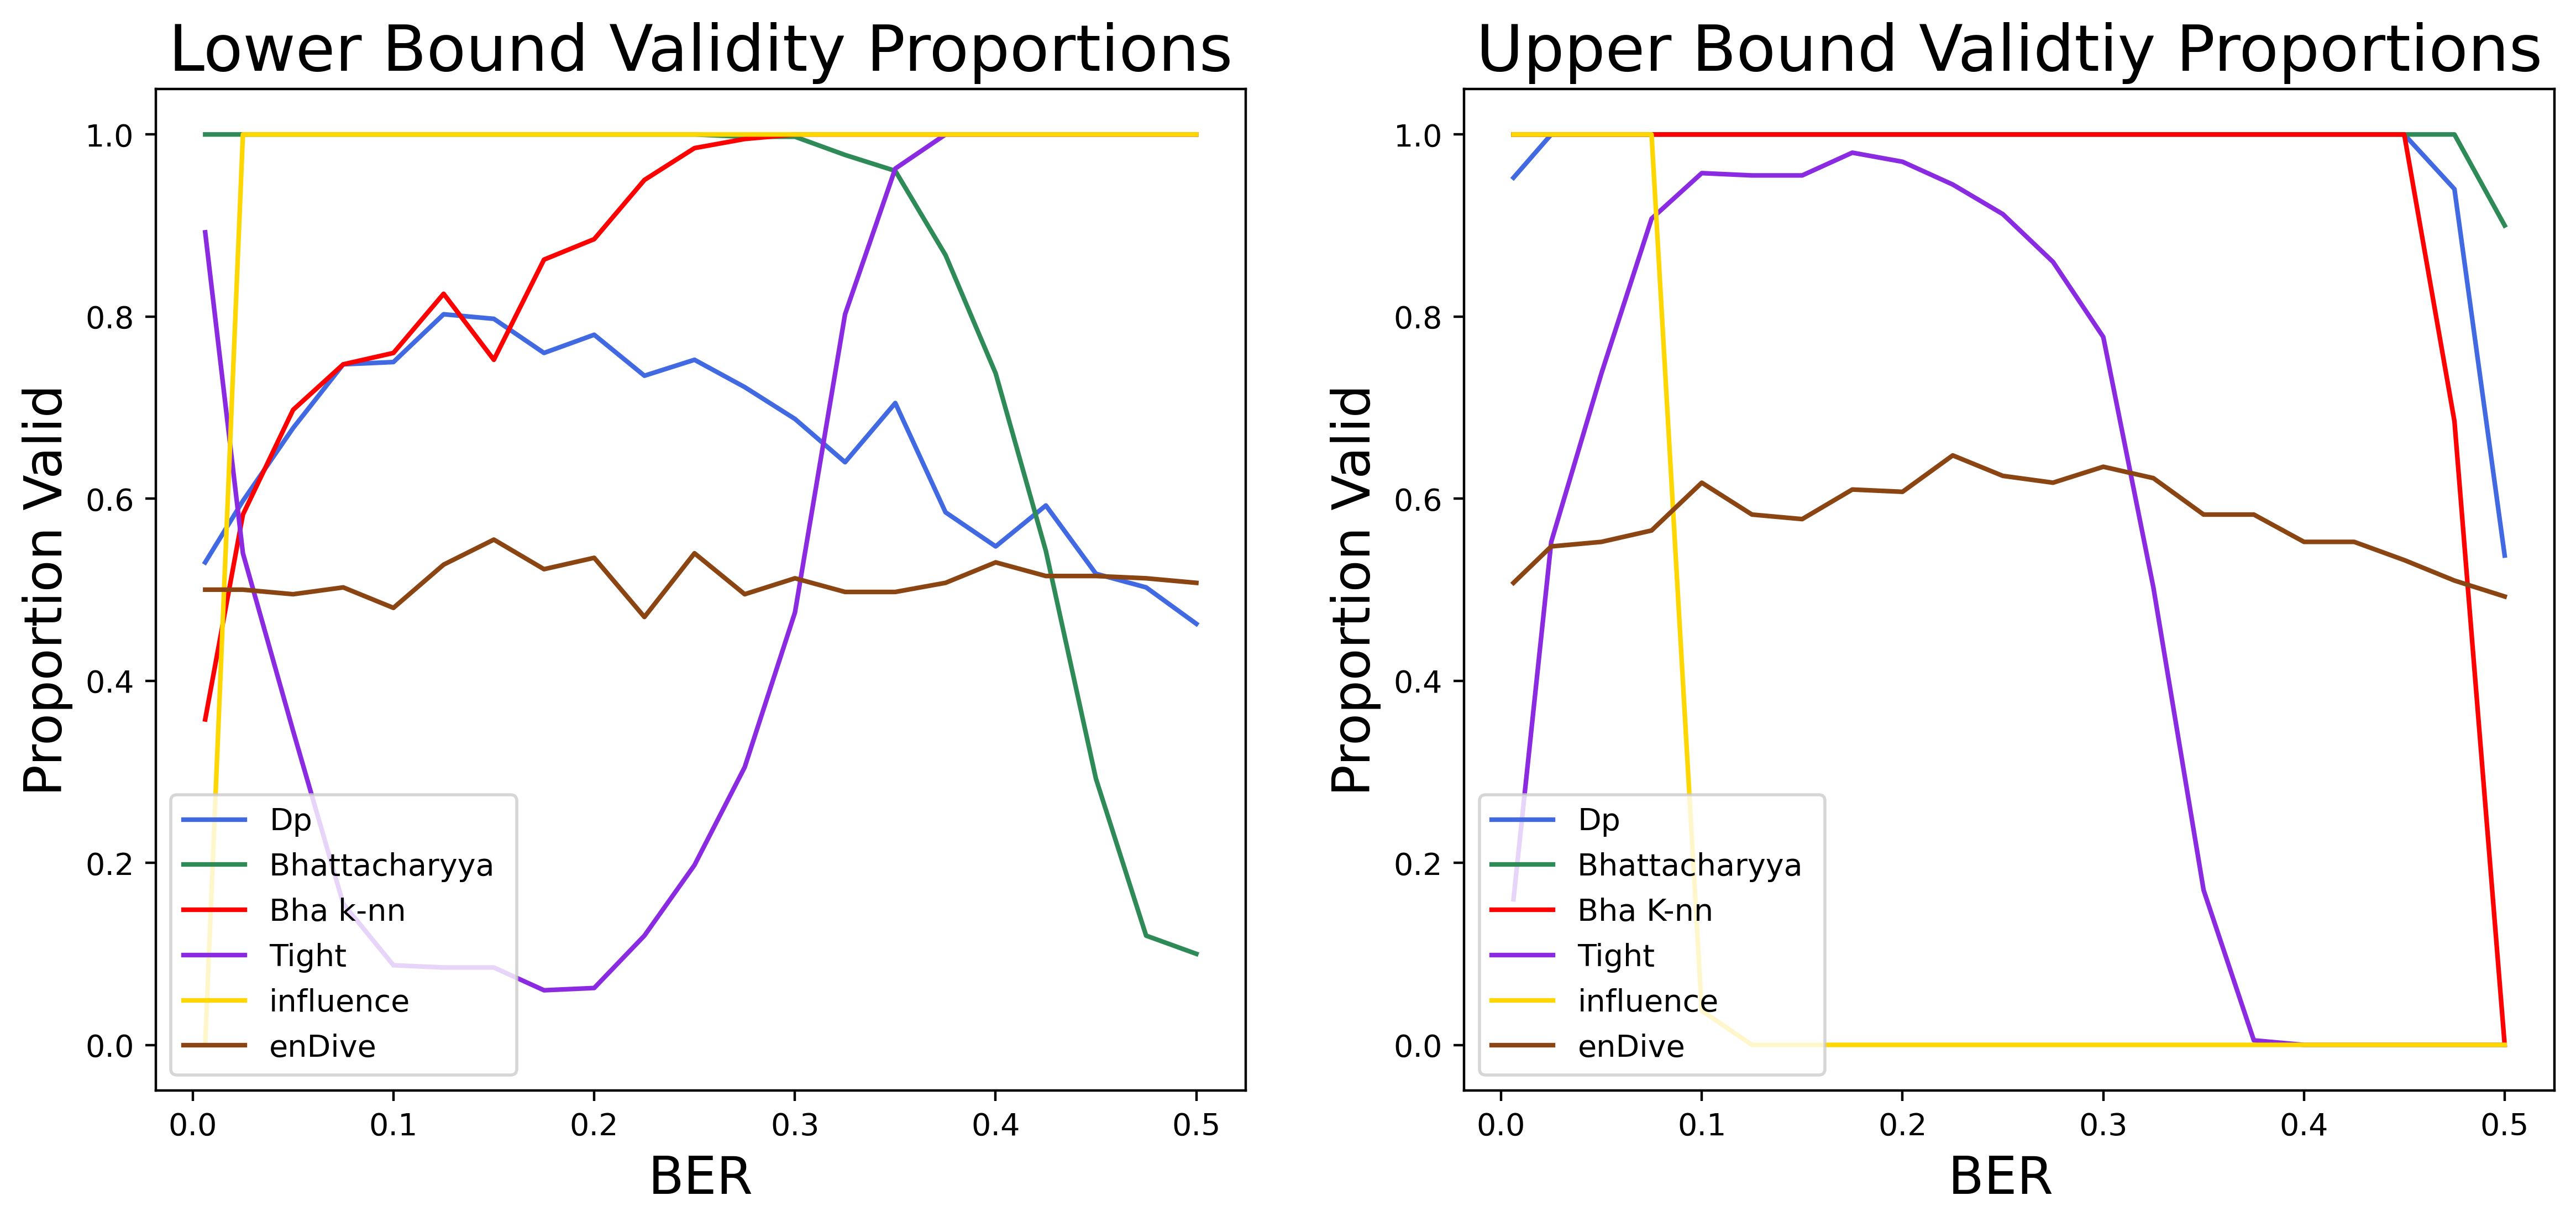

In [23]:
fs =17

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), dpi = dpi)

ax = axes[0]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(df['Dp_lower'], 'royalblue',  label='Dp')

ax.plot(df['Bha_lower'],'seagreen', label='Bhattacharyya ')

ax.plot(df['Bha_knn_lower'],'r', label='Bha k-nn ')

ax.plot(df['tight_lower'], 'blueviolet', label='Tight ')

ax.plot(df['inf_lower'], 'gold', label= 'influence')

ax.plot(df['enDive_lower'], 'saddlebrown', label= 'enDive')


ax.set_xlabel("BER", fontsize = fs)
ax.set_ylabel("Proportion Valid", fontsize=fs)
ax.set_title("Lower Bound Validity Proportions" , fontsize = fs +4)
ax.legend(loc=3)



ax = axes[1]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df['Dp_upper'], 'royalblue',  label='Dp')

ax.plot(df['Bha_upper'],'seagreen', label='Bhattacharyya ')

ax.plot(df['Bha_knn_upper'],'r', label='Bha K-nn ')

ax.plot(df['tight_upper'], 'blueviolet', label='Tight ')

ax.plot(df['inf_upper'], 'gold', label= 'influence')

ax.plot(df['enDive_upper'], 'saddlebrown', label= 'enDive')

# ax.set_ylim([.4, 1.025])
# ax.set_yticks(np.linspace(.5,1,6))


ax.set_xlabel("BER ", fontsize = fs)
ax.set_ylabel("Proportion Valid", fontsize=fs)
ax.set_title("Upper Bound Validtiy Proportions" , fontsize = fs +4)
ax.legend(loc=3)


# plt.savefig("proportions_v2.jpeg",facecolor=(1,1,1,1))
plt.show()